In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from models.models import CNNPolicy, RNNPolicy, PVM
from utils.utils import train_valid_split, test_data, estimate_reward, max_drawdown, sharpe_ratio, fAPV
from training.training import train
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
torch.manual_seed(0)

In [2]:
currencies = ["ETH", "TRX", "LTC", "XRP", "DASH", "AVA", "DOGE", "ATOM"]

In [3]:
df = {}
for currency in currencies:
    df[currency] = pd.read_json(f"./data/USDT/{currency}_USDT_train.json")
    df[currency].columns = ["low", "high", "open", "close", "amount", "quantity", "buyTakerQmount", "buyTakerQuantity", "tradeCount", "ts", "weightedAverage", "interval", "startTime", "closeTime"]
    df[currency]["rolling_mean_close"] = df[currency]["close"].rolling(window = 20).mean()
    df[currency]["rolling_mean_high"] = df[currency]["high"].rolling(window = 20).mean()
    df[currency]["rolling_mean_low"] = df[currency]["low"].rolling(window = 20).mean()

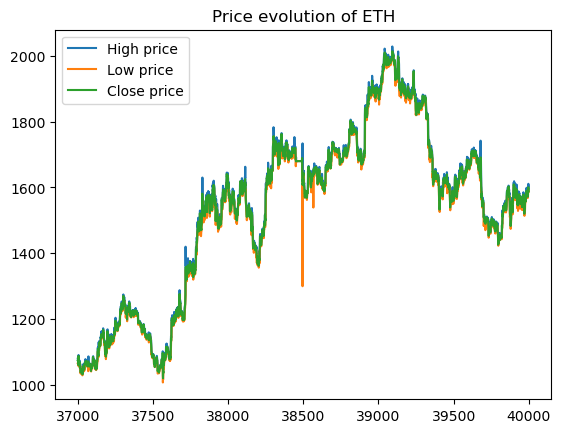

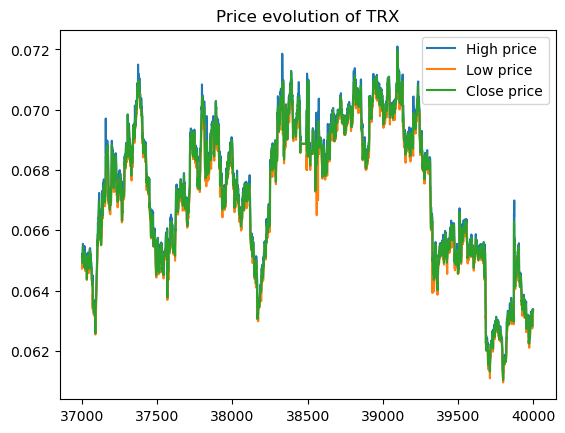

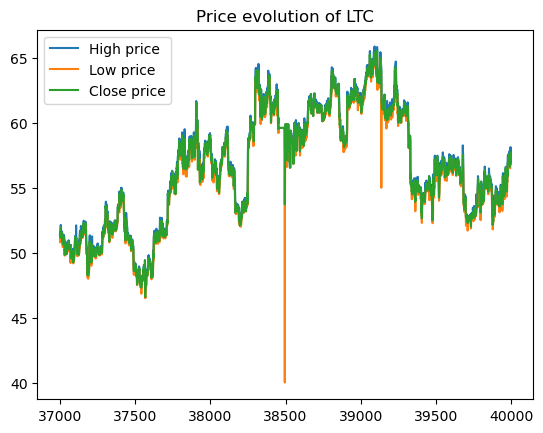

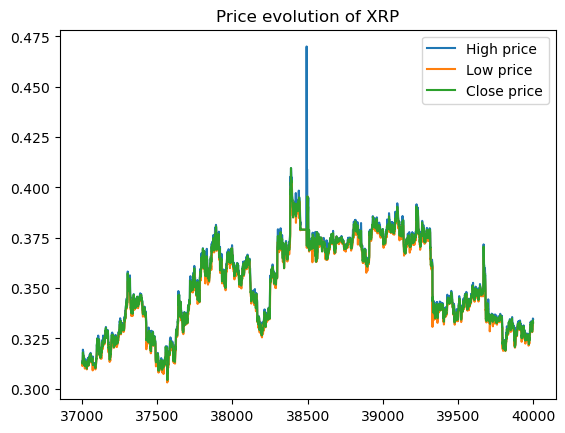

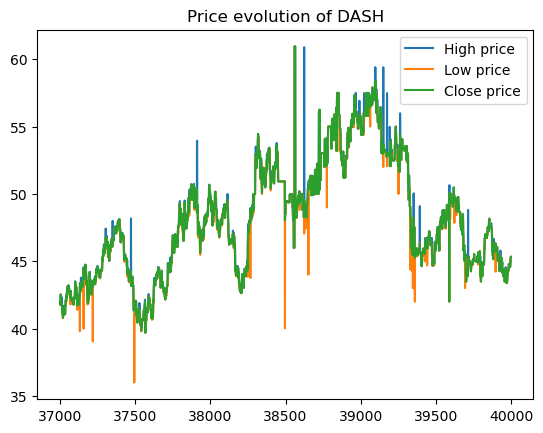

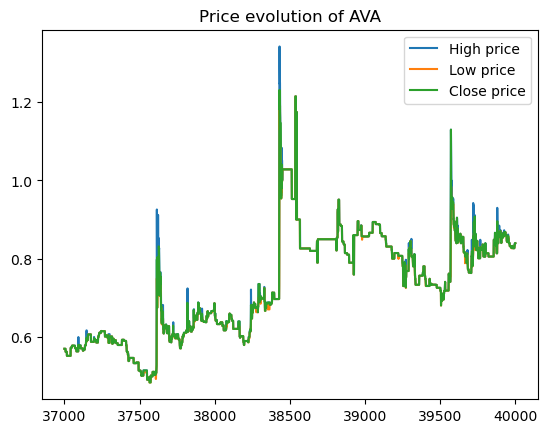

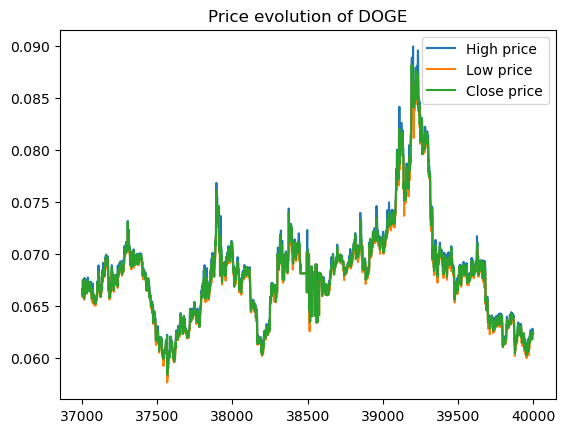

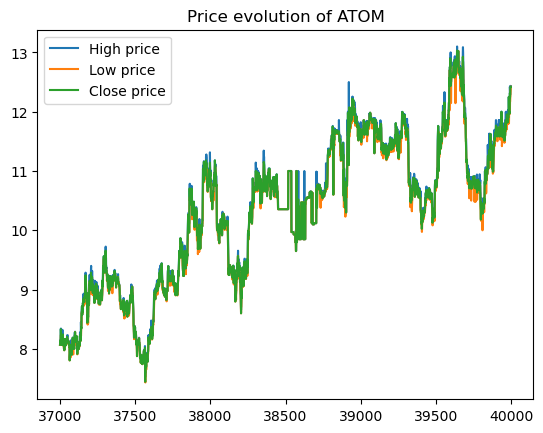

In [5]:
for currency in currencies:
    plt.figure()

    plt.plot(df[currency]["high"][-3000:], label="High price")
    plt.plot(df[currency]["low"][-3000:], label="Low price")
    plt.plot(df[currency]["close"][-3000:], label="Close price")
    plt.title(f"Price evolution of {currency}")
    plt.legend()
#    sns.lineplot(x=index,y="close", data=df[currency])
    plt.show()

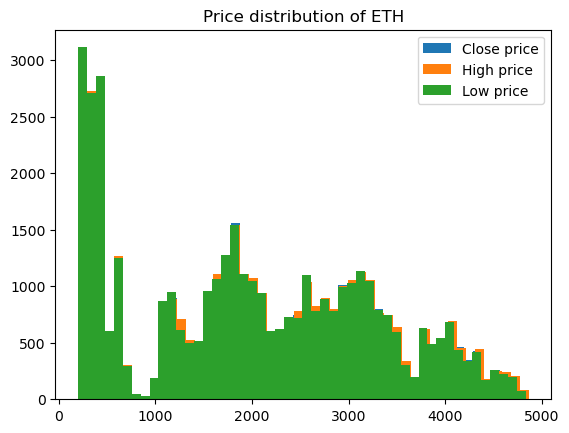

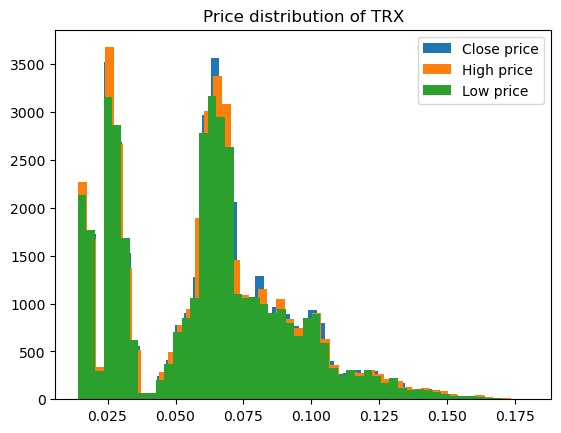

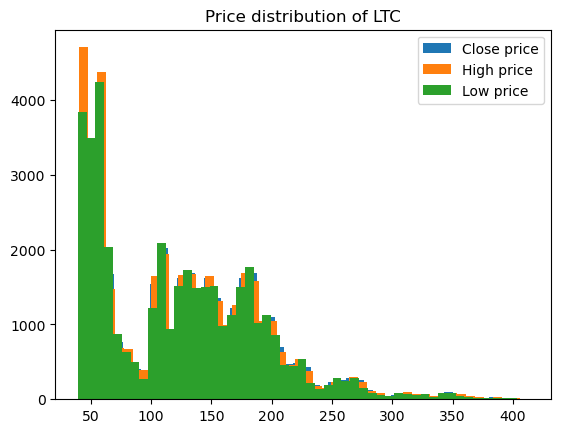

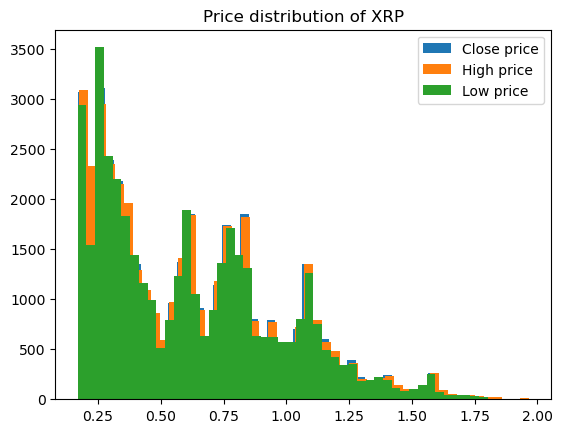

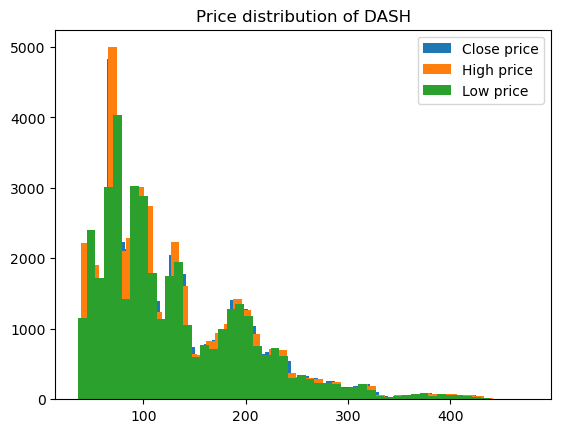

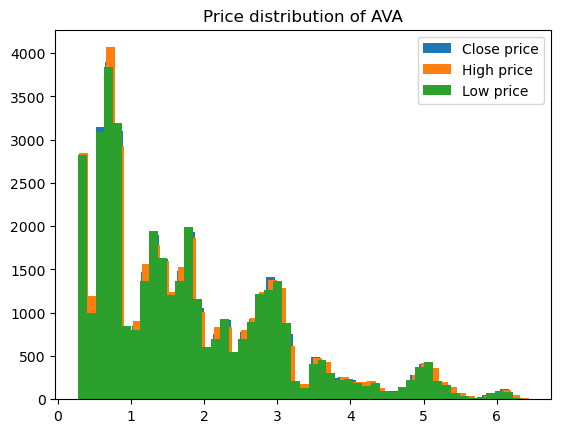

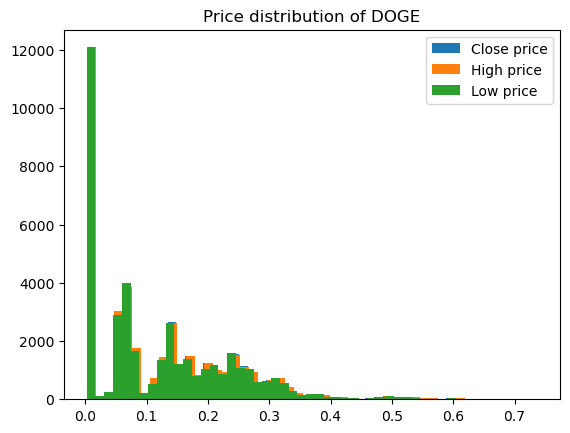

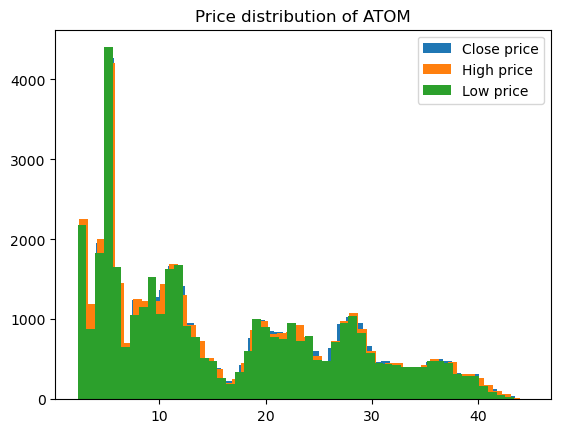

In [9]:
for currency in currencies:
    plt.figure()
    plt.hist(df[currency]["close"], bins=50, label="Close price")
    plt.hist(df[currency]["high"], bins=50, label="High price")
    plt.hist(df[currency]["low"], bins=50, label="Low price")
    plt.title(f"Price distribution of {currency}")
    plt.legend()
#    sns.lineplot(x=index,y="close", data=df[currency])
    plt.show()

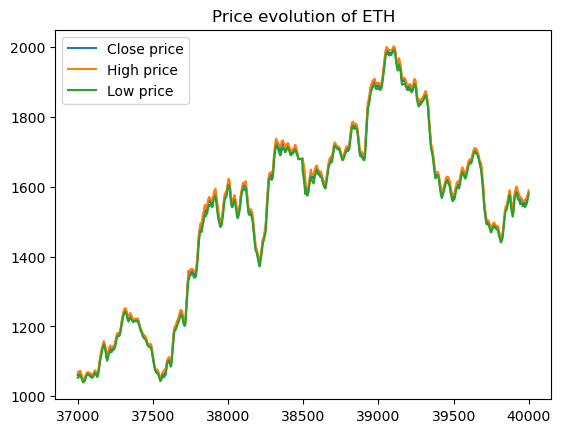

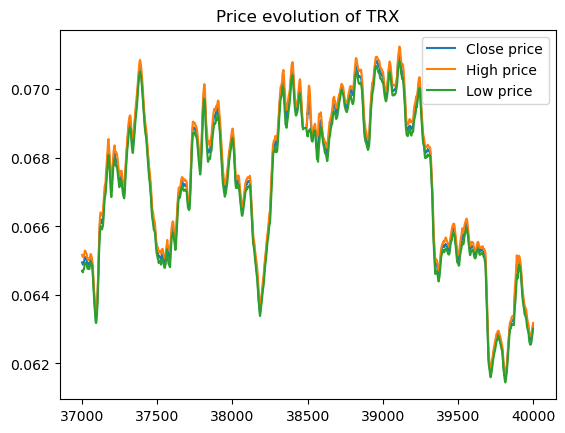

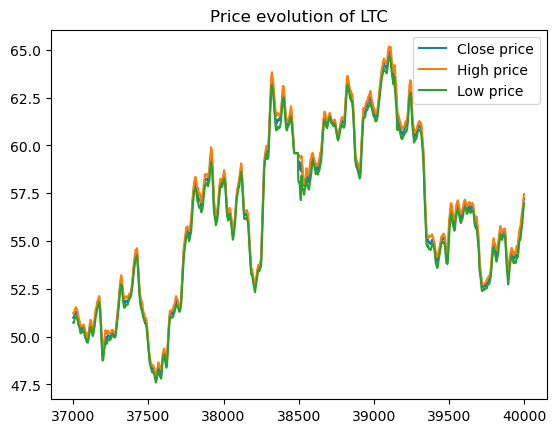

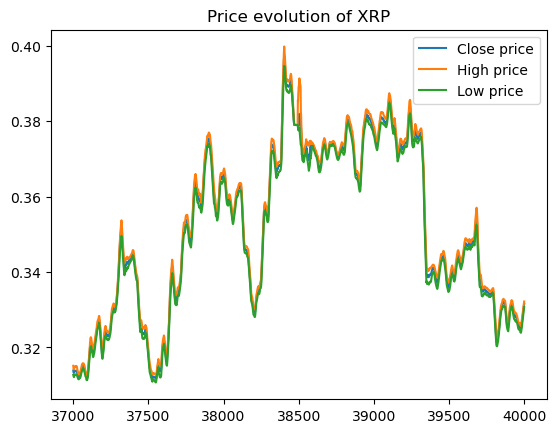

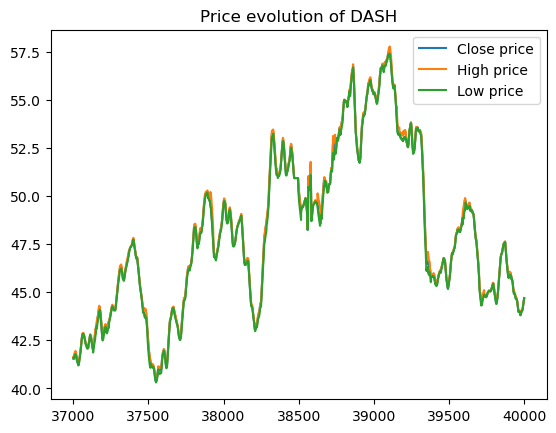

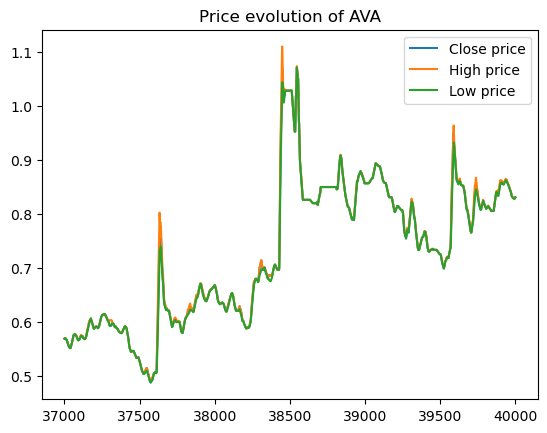

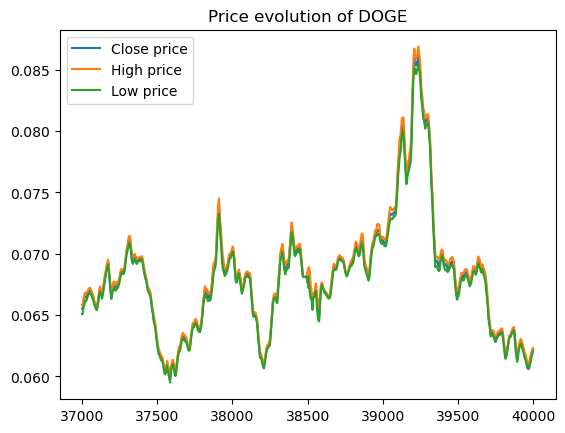

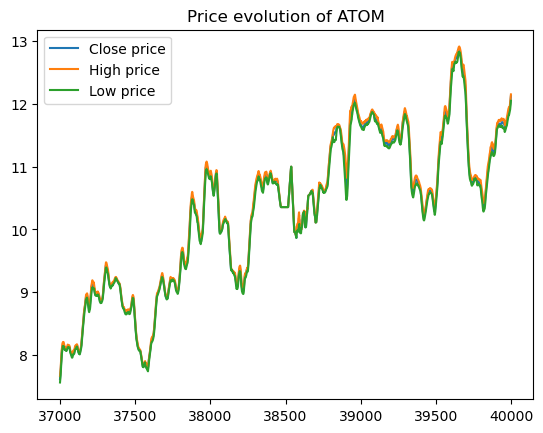

In [6]:
for currency in currencies:
    plt.figure()
    plt.plot(df[currency]["rolling_mean_close"][-3000:], label="Close price")
    plt.plot(df[currency]["rolling_mean_high"][-3000:], label="High price")
    plt.plot(df[currency]["rolling_mean_low"][-3000:], label="Low price")
    plt.title(f"Price evolution of {currency}")
    plt.legend()
#    sns.lineplot(x=index,y="close", data=df[currency])
    plt.show()

### Training

In [12]:
# To do: transform the price into relative price y_t = v_t/v_(t-1)
train_data, valid_data = train_valid_split(df)

[40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000]


In [15]:
with open("data/USDT/train_data.pkl", "wb") as f:
    pickle.dump(train_data, f)
with open("data/USDT/valid_data.pkl", "wb") as f:
    pickle.dump(valid_data, f)

In [2]:
# Load the data
with open("data/USDT/train_data.pkl", "rb") as f:
    train_data = pickle.load(f)
with open("data/USDT/valid_data.pkl", "rb") as f:
    valid_data = pickle.load(f)

In [3]:
cnnPolicy = CNNPolicy()
optimizer = optim.Adam(cnnPolicy.parameters(), lr=1e-4)
train(cnnPolicy, train_data, valid_data, optimizer)

  0%|          | 0/100 [00:00<?, ?it/s]/home/viet1004/reinforcement_learning/portfolio_management/utils/utils.py:78: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525493953/work/aten/src/ATen/native/TensorShape.cpp:3277.)
  current_strategy_prime = previous_strategy * relative_price / previous_strategy.T.dot(relative_price)
  1%|          | 1/100 [00:07<12:53,  7.81s/it]

Epoch 0, train loss: -0.000235, valid loss: -0.000026


  2%|▏         | 2/100 [00:15<12:56,  7.92s/it]

Epoch 1, train loss: -0.000862, valid loss: -0.000028


  3%|▎         | 3/100 [00:21<11:08,  6.89s/it]

Epoch 2, train loss: -0.000485, valid loss: -0.000029


  4%|▍         | 4/100 [00:29<11:29,  7.18s/it]

Epoch 3, train loss: -0.000801, valid loss: -0.000032


  5%|▌         | 5/100 [00:35<10:54,  6.89s/it]

Epoch 4, train loss: -0.000475, valid loss: -0.000034


  6%|▌         | 6/100 [00:43<11:16,  7.20s/it]

Epoch 5, train loss: -0.000511, valid loss: -0.000035


  7%|▋         | 7/100 [00:48<10:23,  6.70s/it]

Epoch 6, train loss: -0.000793, valid loss: -0.000037


  8%|▊         | 8/100 [00:54<09:44,  6.36s/it]

Epoch 7, train loss: -0.000361, valid loss: -0.000038


  9%|▉         | 9/100 [01:00<09:16,  6.11s/it]

Epoch 8, train loss: -0.000764, valid loss: -0.000040


 10%|█         | 10/100 [01:05<08:57,  5.98s/it]

Epoch 9, train loss: -0.000741, valid loss: -0.000043


 11%|█         | 11/100 [01:11<08:50,  5.96s/it]

Epoch 10, train loss: -0.000486, valid loss: -0.000044


 12%|█▏        | 12/100 [01:17<08:41,  5.93s/it]

Epoch 11, train loss: -0.000397, valid loss: -0.000045


 13%|█▎        | 13/100 [01:23<08:28,  5.85s/it]

Epoch 12, train loss: -0.000645, valid loss: -0.000046


 14%|█▍        | 14/100 [01:28<08:19,  5.80s/it]

Epoch 13, train loss: -0.000816, valid loss: -0.000048


 15%|█▌        | 15/100 [01:34<08:10,  5.77s/it]

Epoch 14, train loss: -0.000588, valid loss: -0.000049


 16%|█▌        | 16/100 [01:40<08:05,  5.78s/it]

Epoch 15, train loss: -0.000819, valid loss: -0.000051


 17%|█▋        | 17/100 [01:46<08:11,  5.92s/it]

Epoch 16, train loss: -0.000365, valid loss: -0.000052


 18%|█▊        | 18/100 [01:52<08:11,  6.00s/it]

Epoch 17, train loss: -0.000683, valid loss: -0.000053


 19%|█▉        | 19/100 [01:59<08:13,  6.09s/it]

Epoch 18, train loss: -0.000836, valid loss: -0.000055


 20%|██        | 20/100 [02:05<08:19,  6.24s/it]

Epoch 19, train loss: -0.000824, valid loss: -0.000057


 21%|██        | 21/100 [02:12<08:27,  6.42s/it]

Epoch 20, train loss: -0.000351, valid loss: -0.000058


 22%|██▏       | 22/100 [02:19<08:29,  6.54s/it]

Epoch 21, train loss: -0.000457, valid loss: -0.000058


 23%|██▎       | 23/100 [02:25<08:20,  6.50s/it]

Epoch 22, train loss: -0.000909, valid loss: -0.000059


 24%|██▍       | 24/100 [02:32<08:17,  6.54s/it]

Epoch 23, train loss: -0.000684, valid loss: -0.000060


 25%|██▌       | 25/100 [02:39<08:13,  6.57s/it]

Epoch 24, train loss: -0.000532, valid loss: -0.000060


 26%|██▌       | 26/100 [02:45<08:07,  6.59s/it]

Epoch 25, train loss: -0.000374, valid loss: -0.000061


 27%|██▋       | 27/100 [02:52<08:03,  6.63s/it]

Epoch 26, train loss: -0.000428, valid loss: -0.000061


 28%|██▊       | 28/100 [02:58<07:52,  6.57s/it]

Epoch 27, train loss: -0.000836, valid loss: -0.000061


 29%|██▉       | 29/100 [03:05<07:48,  6.59s/it]

Epoch 28, train loss: -0.000353, valid loss: -0.000062


 30%|███       | 30/100 [03:12<07:54,  6.78s/it]

Epoch 29, train loss: -0.000296, valid loss: -0.000062


 31%|███       | 31/100 [03:22<08:40,  7.54s/it]

Epoch 30, train loss: -0.000153, valid loss: -0.000062


 32%|███▏      | 32/100 [03:31<09:07,  8.05s/it]

Epoch 31, train loss: -0.000337, valid loss: -0.000061


 33%|███▎      | 33/100 [03:38<08:51,  7.94s/it]

Epoch 32, train loss: -0.000683, valid loss: -0.000061


 34%|███▍      | 34/100 [03:45<08:18,  7.55s/it]

Epoch 33, train loss: -0.000214, valid loss: -0.000061


 35%|███▌      | 35/100 [03:52<08:03,  7.45s/it]

Epoch 34, train loss: -0.000351, valid loss: -0.000061


 36%|███▌      | 36/100 [03:59<07:37,  7.14s/it]

Epoch 35, train loss: -0.000569, valid loss: -0.000061


 37%|███▋      | 37/100 [04:05<07:18,  6.96s/it]

Epoch 36, train loss: -0.000484, valid loss: -0.000061


 38%|███▊      | 38/100 [04:14<07:47,  7.55s/it]

Epoch 37, train loss: -0.000594, valid loss: -0.000061


 39%|███▉      | 39/100 [04:21<07:23,  7.27s/it]

Epoch 38, train loss: -0.000413, valid loss: -0.000061


 40%|████      | 40/100 [04:27<07:03,  7.05s/it]

Epoch 39, train loss: -0.000300, valid loss: -0.000062


 41%|████      | 41/100 [04:34<06:46,  6.88s/it]

Epoch 40, train loss: -0.000297, valid loss: -0.000062


 42%|████▏     | 42/100 [04:41<06:35,  6.82s/it]

Epoch 41, train loss: 0.000310, valid loss: -0.000061


 43%|████▎     | 43/100 [04:47<06:25,  6.76s/it]

Epoch 42, train loss: -0.000127, valid loss: -0.000060


 44%|████▍     | 44/100 [04:54<06:25,  6.89s/it]

Epoch 43, train loss: -0.000690, valid loss: -0.000060


 45%|████▌     | 45/100 [05:01<06:11,  6.75s/it]

Epoch 44, train loss: 0.000038, valid loss: -0.000059


 45%|████▌     | 45/100 [05:07<06:16,  6.84s/it]

Epoch 45, train loss: -0.000170, valid loss: -0.000059


([array(-0.00023498, dtype=float32),
  array(-0.00086177, dtype=float32),
  array(-0.00048521, dtype=float32),
  array(-0.00080141, dtype=float32),
  array(-0.00047543, dtype=float32),
  array(-0.00051149, dtype=float32),
  array(-0.00079317, dtype=float32),
  array(-0.00036138, dtype=float32),
  array(-0.00076393, dtype=float32),
  array(-0.00074097, dtype=float32),
  array(-0.00048555, dtype=float32),
  array(-0.00039725, dtype=float32),
  array(-0.00064548, dtype=float32),
  array(-0.00081601, dtype=float32),
  array(-0.00058762, dtype=float32),
  array(-0.00081891, dtype=float32),
  array(-0.00036534, dtype=float32),
  array(-0.00068306, dtype=float32),
  array(-0.00083555, dtype=float32),
  array(-0.0008241, dtype=float32),
  array(-0.00035147, dtype=float32),
  array(-0.00045702, dtype=float32),
  array(-0.00090866, dtype=float32),
  array(-0.00068437, dtype=float32),
  array(-0.00053241, dtype=float32),
  array(-0.00037437, dtype=float32),
  array(-0.00042785, dtype=float32),
  

In [4]:
rnnPolicy = RNNPolicy()
optimizer = optim.Adam(rnnPolicy.parameters(), lr=1e-3)
train(rnnPolicy, train_data, valid_data, optimizer)

  1%|          | 1/100 [00:50<1:23:33, 50.64s/it]

Epoch 0, train loss: -0.000524, valid loss: -0.000025


  2%|▏         | 2/100 [02:05<1:45:55, 64.86s/it]

Epoch 1, train loss: -0.000532, valid loss: -0.000026


  3%|▎         | 3/100 [03:01<1:38:11, 60.74s/it]

Epoch 2, train loss: -0.000503, valid loss: -0.000027


  4%|▍         | 4/100 [03:50<1:30:06, 56.32s/it]

Epoch 3, train loss: -0.000616, valid loss: -0.000028


  5%|▌         | 5/100 [04:33<1:21:07, 51.24s/it]

Epoch 4, train loss: -0.000617, valid loss: -0.000030


  6%|▌         | 6/100 [05:13<1:14:33, 47.60s/it]

Epoch 5, train loss: -0.000389, valid loss: -0.000031


  7%|▋         | 7/100 [05:57<1:11:41, 46.26s/it]

Epoch 6, train loss: -0.000767, valid loss: -0.000031


  8%|▊         | 8/100 [06:33<1:06:17, 43.23s/it]

Epoch 7, train loss: -0.000744, valid loss: -0.000030


  9%|▉         | 9/100 [07:08<1:01:39, 40.66s/it]

Epoch 8, train loss: -0.000705, valid loss: -0.000030


 10%|█         | 10/100 [10:31<2:16:10, 90.79s/it]

Epoch 9, train loss: -0.000617, valid loss: -0.000030


 11%|█         | 11/100 [15:11<3:40:15, 148.49s/it]

Epoch 10, train loss: -0.000655, valid loss: -0.000030


 12%|█▏        | 12/100 [18:36<4:02:59, 165.68s/it]

Epoch 11, train loss: -0.000706, valid loss: -0.000031


 13%|█▎        | 13/100 [21:41<4:08:56, 171.68s/it]

Epoch 12, train loss: -0.000638, valid loss: -0.000031


 14%|█▍        | 14/100 [23:30<3:38:41, 152.57s/it]

Epoch 13, train loss: -0.000373, valid loss: -0.000031


 15%|█▌        | 15/100 [25:10<3:13:45, 136.77s/it]

Epoch 14, train loss: -0.000720, valid loss: -0.000031


 16%|█▌        | 16/100 [26:07<2:37:51, 112.75s/it]

Epoch 15, train loss: -0.000641, valid loss: -0.000031


 17%|█▋        | 17/100 [26:56<2:09:39, 93.72s/it] 

Epoch 16, train loss: -0.000571, valid loss: -0.000031


 18%|█▊        | 18/100 [28:18<2:03:13, 90.16s/it]

Epoch 17, train loss: -0.000425, valid loss: -0.000031


 19%|█▉        | 19/100 [30:10<2:10:26, 96.62s/it]

Epoch 18, train loss: -0.000750, valid loss: -0.000032


 20%|██        | 20/100 [31:30<2:02:19, 91.75s/it]

Epoch 19, train loss: -0.000400, valid loss: -0.000032


 21%|██        | 21/100 [32:57<1:58:53, 90.30s/it]

Epoch 20, train loss: -0.000791, valid loss: -0.000032


 22%|██▏       | 22/100 [34:47<2:05:00, 96.16s/it]

Epoch 21, train loss: -0.000631, valid loss: -0.000032


 23%|██▎       | 23/100 [36:53<2:14:46, 105.02s/it]

Epoch 22, train loss: -0.000533, valid loss: -0.000031


 24%|██▍       | 24/100 [39:38<2:36:06, 123.25s/it]

Epoch 23, train loss: -0.000310, valid loss: -0.000031


 24%|██▍       | 24/100 [41:29<2:11:23, 103.73s/it]

Epoch 24, train loss: -0.000406, valid loss: -0.000031


([array(-0.00052396, dtype=float32),
  array(-0.0005324, dtype=float32),
  array(-0.00050326, dtype=float32),
  array(-0.0006157, dtype=float32),
  array(-0.00061741, dtype=float32),
  array(-0.00038857, dtype=float32),
  array(-0.00076688, dtype=float32),
  array(-0.00074407, dtype=float32),
  array(-0.00070505, dtype=float32),
  array(-0.00061699, dtype=float32),
  array(-0.00065547, dtype=float32),
  array(-0.00070605, dtype=float32),
  array(-0.00063766, dtype=float32),
  array(-0.00037328, dtype=float32),
  array(-0.00071997, dtype=float32),
  array(-0.00064123, dtype=float32),
  array(-0.00057149, dtype=float32),
  array(-0.00042545, dtype=float32),
  array(-0.00075029, dtype=float32),
  array(-0.00040017, dtype=float32),
  array(-0.00079117, dtype=float32),
  array(-0.0006314, dtype=float32),
  array(-0.00053348, dtype=float32),
  array(-0.00031001, dtype=float32),
  array(-0.00040621, dtype=float32)],
 [array(-2.4772273e-05, dtype=float32),
  array(-2.5693369e-05, dtype=float32

In [5]:
torch.save(cnnPolicy.state_dict(), "models/cnnPolicy.pth")
torch.save(rnnPolicy.state_dict(), "models/rnnPolicy.pth")

### Backtest


In [3]:
df_test = {}
for currency in currencies:
    df_test[currency] = pd.read_json(f"./data/USDT/{currency}_USDT_test.json")
    df_test[currency] = df_test[currency].iloc[:2000]
    df_test[currency].columns = ["low", "high", "open", "close", "amount", "quantity", "buyTakerQmount", "buyTakerQuantity", "tradeCount", "ts", "weightedAverage", "interval", "startTime", "closeTime"]

df_test["ETH"]["close"]

0       1591.76
1       1584.93
2       1589.17
3       1593.13
4       1594.02
         ...   
1995    1285.79
1996    1286.64
1997    1294.57
1998    1293.34
1999    1294.10
Name: close, Length: 2000, dtype: float64

In [4]:
test_data = test_data(df_test)

In [5]:
# Backtesting
# Path: backtesting.ipynb

def best_stock():
    single_returns = [df_test[currency]["close"].iloc[-1]/df_test[currency]["close"].iloc[0] for currency in currencies]
    current_best = np.argmax(single_returns)
    return np.array([0] + [1 if i == current_best else 0 for i in range(len(currencies))])

def uniform_constant_rebalanced_portfolio():
    return np.array([1/(len(currencies)+1) for _ in range(len(currencies)+1)])

def buy_and_hold(date, previous_strategy = None):
    if date == 0:
        return [1/(len(currencies)+1) for _ in range(len(currencies)+1)]
    vector_price = np.array([1] + [df_test[currency]["close"].iloc[date]/df_test[currency]["close"].iloc[date-1] for currency in currencies])
    return previous_strategy * vector_price/np.sum(previous_strategy * vector_price)

In [6]:
# Load models
cnnPolicy = CNNPolicy()
cnnPolicy.load_state_dict(torch.load("models/cnnPolicy.pth"))
rnnPolicy = RNNPolicy()
rnnPolicy.load_state_dict(torch.load("models/rnnPolicy.pth"))

<All keys matched successfully>

In [10]:
n = 50
def eval_strategy():
    df = {}
    init_strategy_buy_and_hold = np.array(buy_and_hold(0))
    strategy_cnn = torch.from_numpy(init_strategy_buy_and_hold).float()
    strategy_rnn = torch.from_numpy(init_strategy_buy_and_hold).float()
    strategy_buy_and_hold = torch.from_numpy(init_strategy_buy_and_hold).clone().detach()

    return_best_stock = []
    return_ucrp = []
    return_buy_and_hold = []
    return_cnn = []
    return_rnn = []

    for i in np.arange(n+1, len(df_test["ETH"]["close"])-1):
        strategy_best_stock = torch.from_numpy(best_stock()).float()
        strategy_uniform_constant_rebalanced_portfolio = torch.from_numpy(uniform_constant_rebalanced_portfolio()).float()
        previous_strategy_buy_and_hold = strategy_buy_and_hold
        strategy_buy_and_hold = torch.from_numpy(buy_and_hold(i, strategy_buy_and_hold.cpu().data.numpy())).float()
        previous_strategy_cnn = strategy_cnn
        curr_state_cnn = (test_data[i-n], previous_strategy_cnn[1:].float())
        strategy_cnn = cnnPolicy(curr_state_cnn).squeeze(1)
        previous_strategy_rnn = strategy_rnn
        curr_state_rnn = (test_data[i-n], previous_strategy_rnn[1:].float())
        strategy_rnn = rnnPolicy(curr_state_rnn).squeeze(1)
        
        relative_price = torch.concatenate((torch.from_numpy(np.array([1.])), 1/test_data[i-n+1][0][:,-2].squeeze(-1))).float()
        
        return_best_stock.append(estimate_reward(strategy_best_stock, strategy_best_stock, relative_price).cpu().data.numpy())
        return_ucrp.append(estimate_reward(strategy_uniform_constant_rebalanced_portfolio, strategy_uniform_constant_rebalanced_portfolio, relative_price).cpu().data.numpy())
        return_buy_and_hold.append(estimate_reward(previous_strategy_buy_and_hold.float(), strategy_buy_and_hold, relative_price).cpu().data.numpy())
        return_cnn.append(estimate_reward(previous_strategy_cnn, strategy_cnn, relative_price).cpu().data.numpy())
        return_rnn.append(estimate_reward(previous_strategy_rnn, strategy_rnn, relative_price).cpu().data.numpy())

    plt.plot(np.cumsum(np.array(return_best_stock)), label="Best stock")
    plt.plot(np.cumsum(np.array(return_ucrp)), label="UCRP")
    plt.plot(np.cumsum(np.array(return_buy_and_hold)), label="Buy and hold")
    plt.plot(np.cumsum(np.array(return_cnn)), label="CNN")
    plt.plot(np.cumsum(np.array(return_rnn)), label="RNN")
    plt.legend()
    plt.show()

    returns = {"BS":return_best_stock, "UCRP": return_ucrp, "B&H":return_buy_and_hold, "CNN":return_cnn, "RNN":return_rnn}
    # let's create a dataframe with indexes = ["BS", "UCRP", "B&H", "CNN", "RNN"] and columns = ["MDD", "fAPV", "SR"]
    performance = pd.DataFrame(index=["BS", "UCRP", "B&H", "CNN", "RNN"], columns=["MDD", "fAPV", "SR"])
    for individual_return in returns:
        mdd = max_drawdown(returns[individual_return])
        Cumulative_return = fAPV(returns[individual_return])
        SR = sharpe_ratio(returns[individual_return])
        performance.loc[individual_return] = [mdd, Cumulative_return, SR]

    return performance



    


In [9]:
len(test_data)

1950

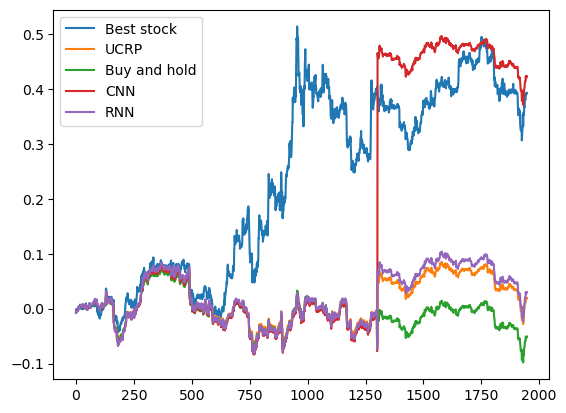

,MDD,fAPV,SR
BS,3.001304,0.392698,0.025398
UCRP,4.093154,0.019438,0.002182
B&H,4.090664,-0.050888,-0.006543
CNN,4.114211,0.423143,0.01685
RNN,4.097844,0.030139,0.002944


In [11]:
performance = eval_strategy()
performance